In [ ]:
import pandas as pd
import re # for regular expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/bajwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bajwa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/bajwa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 12.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pd.set_option('display.max_colwidth', None)
# load the dataset
try:
    df=pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Dataset file not found. Please ensure 'dataset.csv' is in the current directory.")
    exit()

# PRINT
print("Dataset loaded successfully. Here are the first few rows:")
print(df.head())  

Dataset loaded successfully. Here are the first few rows:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
print("\Dataset information")
df.info()

\Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3548/354693225.py:1: SyntaxWarning: invalid escape sequence '\D'
  print("\Dataset information")


In [ ]:
print("\Sent distribution") 
print(df['sentiment'].value_counts())
# Get the list of English stop words
stop_words = set(stopwords.words('english'))
stop_words

\Sent distribution
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_3548/2666571682.py:1: SyntaxWarning: invalid escape sequence '\S'
  print("\Sent distribution")


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:

def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [ ]:
print("Preprocessing all the reviews")
df = df.sample(1000).copy()
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("preprocessing done")

#display a comparison of the original and cleaned review
display(df[['review', 'cleaned_review']].head())

Preprocessing all the reviews
preprocessing done


,review,cleaned_review
36773,"**Spoilers contained**<br /><br />I'd heard from various sources that this film was controversial and that the ending in particular was horrific. What I didn't expect was the complete change in tack with about twenty minutes to go. What starts off as a typical cowboy/indian western suddenly descends into a very dull romantic 'comedy' about Honus (Soldier Blue of the title played by Peter Strauss) and Cresta (Candice Bergen) who escape an onslaught of the cavalry by the Cheyenne. The majority of the film then focuses on these two mismatched people hence the romantic comedy bit. Donald Pleasance then turns up and abducts them both for no real apparent reason. They then escape and both turn up (separately) at the cavalry base on the eve of an attack on the Cheyenne base. As Cresta used to be married to one of the Cheyenne chiefs she escapes the cavalry base and joins up with them. So far so ordinary. Then comes the ending. After enduring well over an hour of poor acting involving a cliched will they/won't they get together storyline, the movie then transforms into over the top exploitation involving among other things a decapitation and a child being shot in the back of the head. Similarities can be drawn with the Wild Bunch at this point of the film but the Wild Bunch kept the same tone throughout and didn't resort to extreme gratuitous violence. In some ways, Soldier Blue reminds me of Frank Perry's Last Summer which also completely changed tack for a shock ending. I didn't hate Soldier Blue nor find the ending particularly disturbing but just found it to be pretty dull with an unnecessarily violent ending. If you want to see a film with a truly disturbing slaughter of the innocents, I would recommend Elem Klimov's Come and See.",spoiler containedid hear various source film controversial end particular horrific do not expect complete change tack twenty minute go start typical cowboyindian western suddenly descend dull romantic comedy honus soldier blue title play peter strauss cresta candice bergen escape onslaught cavalry cheyenne majority film focus two mismatch people hence romantic comedy bit donald pleasance turn abduct real apparent reason escape turn separately cavalry base eve attack cheyenne base cresta use marry one cheyenne chiefs escape cavalry base join far ordinary comes end endure well hour poor acting involve cliched theywont get together storyline movie transform top exploitation involve among thing decapitation child shoot back head similarity draw wild bunch point film wild bunch keep tone throughout do not resort extreme gratuitous violence way soldier blue remind frank perrys last summer also completely change tack shock ending do not hate soldier blue find end particularly disturbing find pretty dull unnecessarily violent ending want see film truly disturb slaughter innocent would recommend elem klimovs come see
16184,"Wow, this film was just bloody horrid. SO bad in fact that even though I didn't pay to see it, I still wanted my money back.<br /><br />The film is about nothing intelligible. It's a mish-mash of sci-fi cliche's that were done better by much more skilled film makers. The performances, especially by the leads were over the top in a less endearing Ed Wood sort of way. Speaking of Ed Wood, he'd be proud of the character's dialogue. It's just too taciturn with no hint of irony or sense of humor. On top of that, it doesn't make sense, nor does the plot, or lackthereof.<br /><br />The visual effects are okay, but not enough to go ""oh wow, that's cool"" and they just seem to be thrown in to ""be cool"" rather than be a good plot device.<br /><br />The soundtrack was another mishmash of stuff that really never set any sort of mood. Again, it seemed as if the director was just throwing in songs in the film in an effort to ""be cool"".<br /><br />Which brings me to my final point. Perhaps if the director actually worried more about plot, story and dialogue instead of try

In [ ]:
from sklearn.model_selection import train_test_split

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 800
Testing set size: 200


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (800, 5000)
Shape of the testing TF-IDF matrix: (200, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [ ]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Negative

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Model Accuracy: 0.8100

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.78      0.81       104
    Positive       0.78      0.84      0.81        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



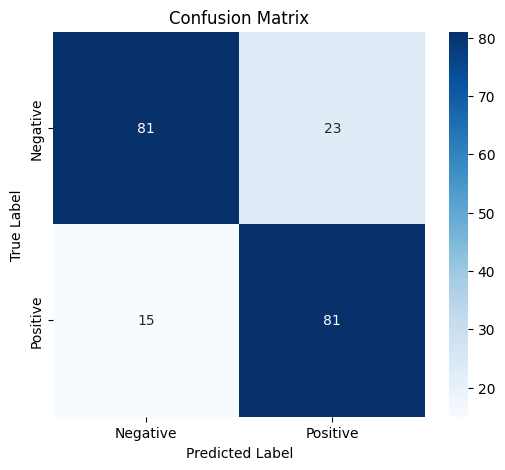

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix")
plt.show()